In [1]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#  Step 2: Load the Dataset

df = pd.read_csv("Zoo.csv")
df.head()  # Show first 5 rows

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#  Step 3: Data Exploration (Visualize the Data)

In [4]:
# Check basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
             hair 

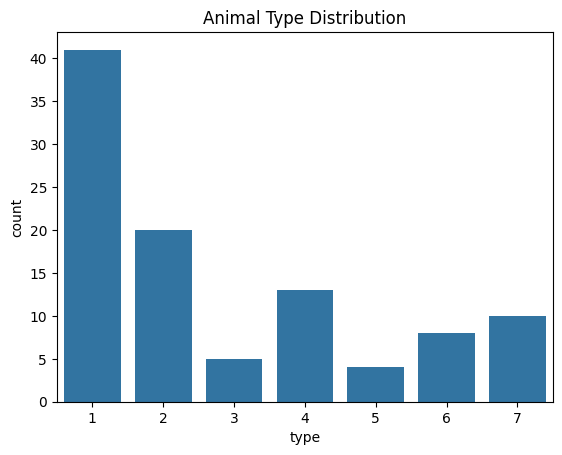

In [5]:
# Check target variable distribution
sns.countplot(x='type', data=df)
plt.title("Animal Type Distribution")
plt.show()

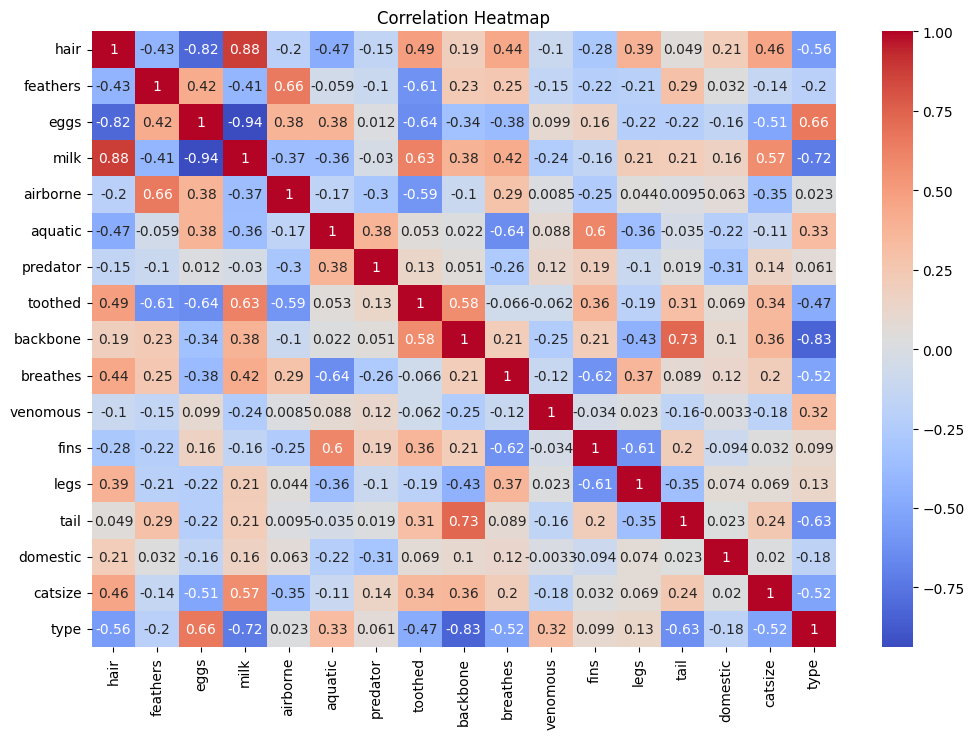

In [7]:
# Check correlation heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

#  Now plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
#  Step 4: Preprocessing (Check Missing Values & Outliers)

Missing Values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


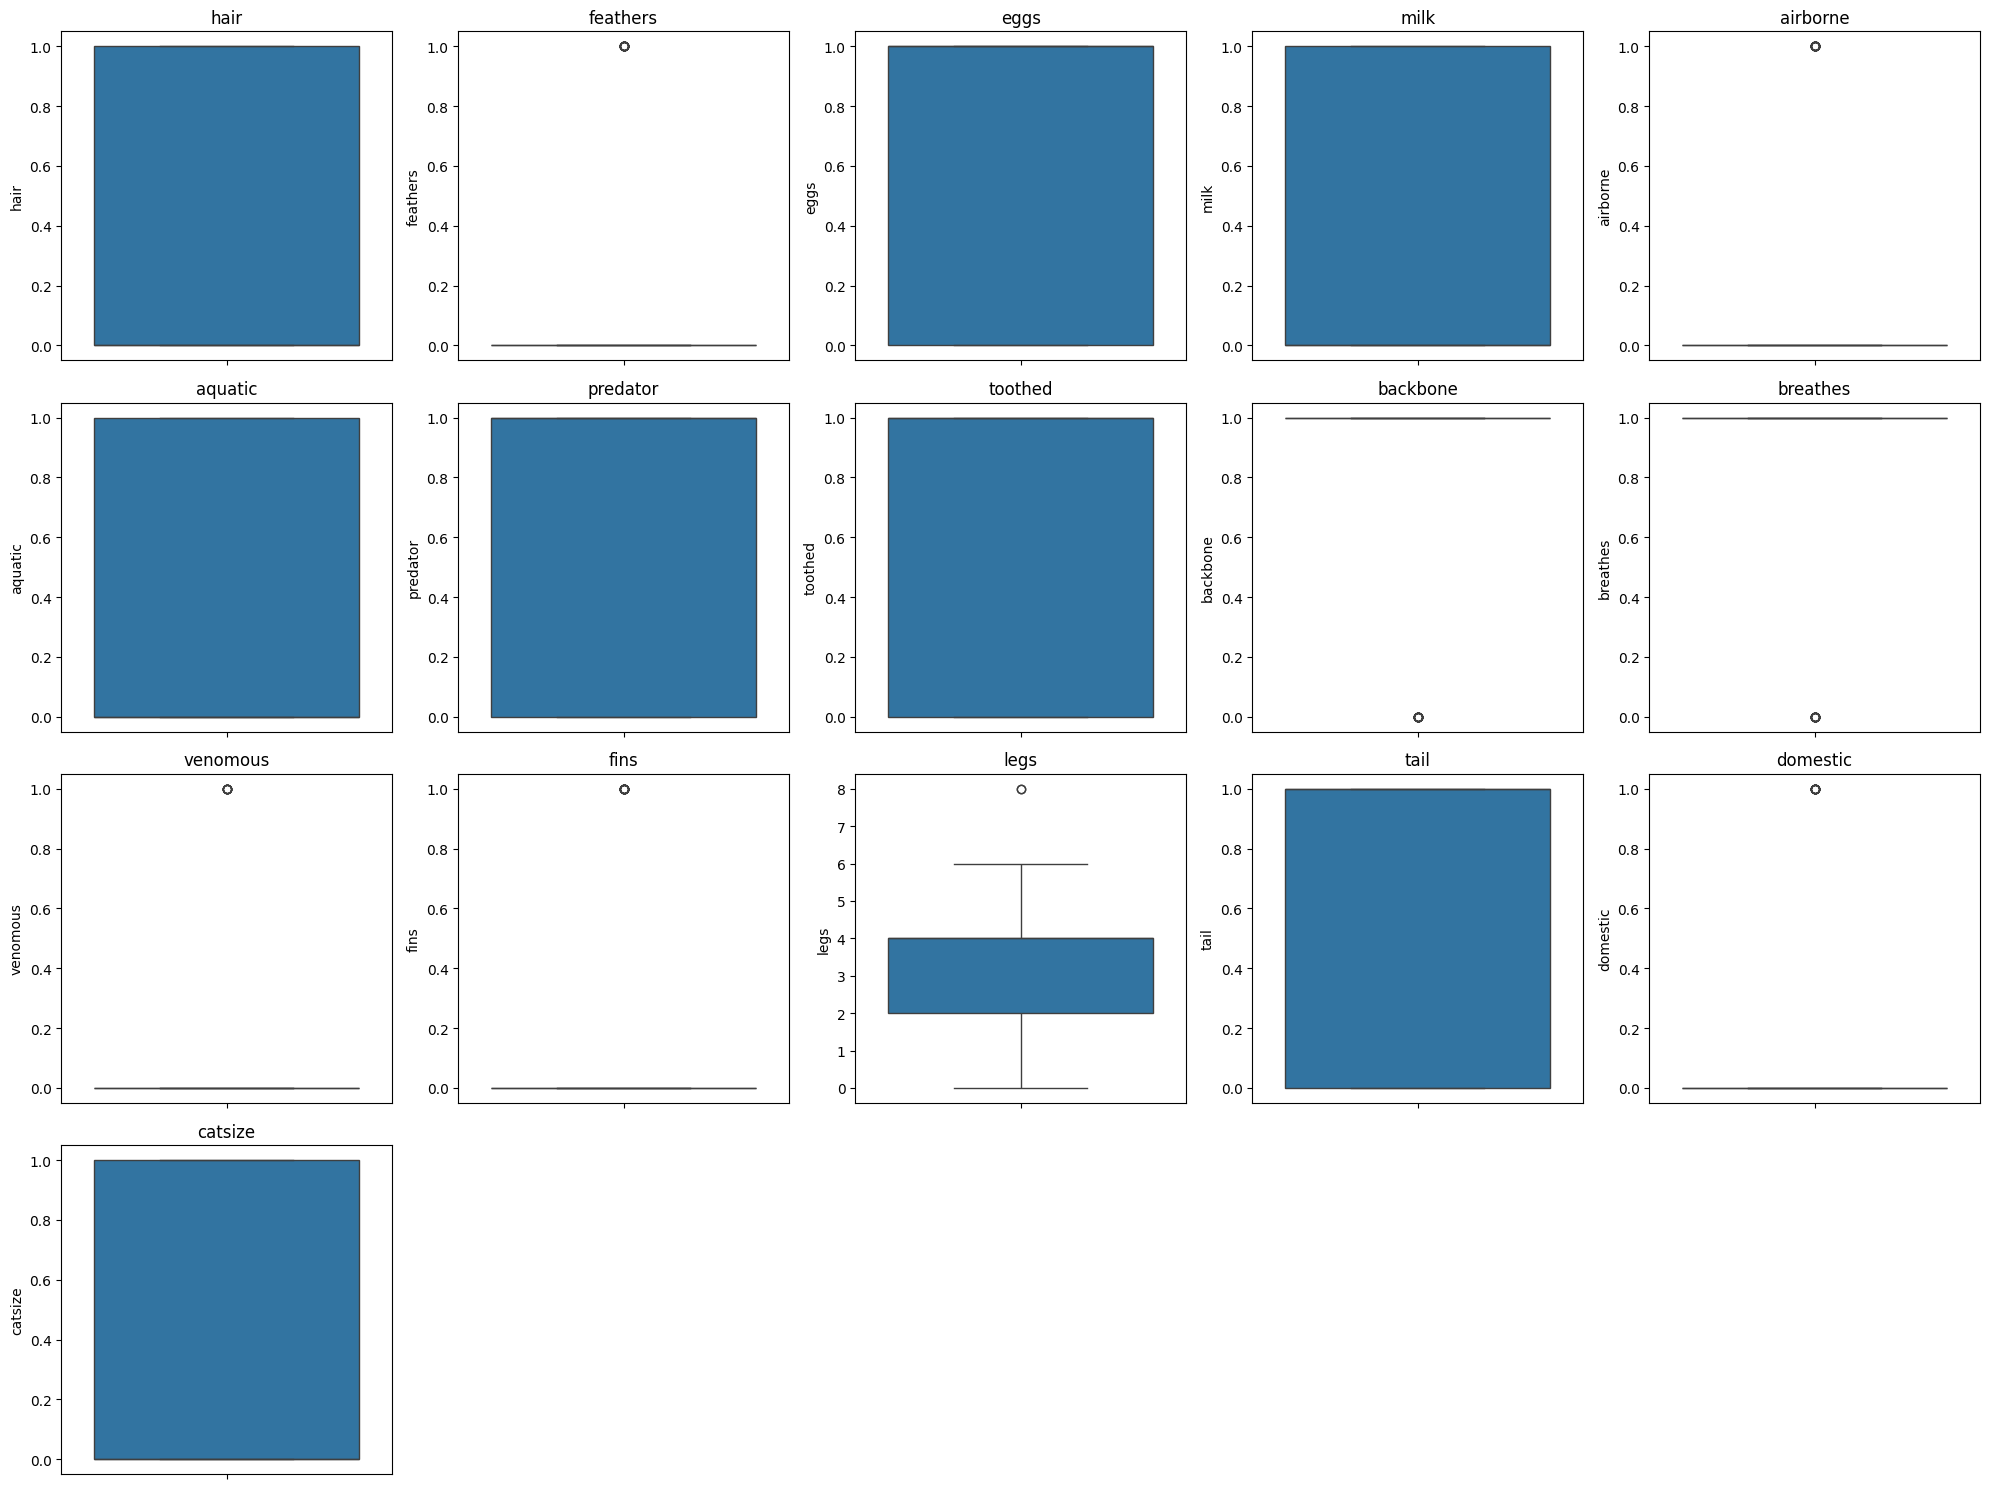

In [9]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for outliers with boxplots
features = df.columns[1:-1]  # Exclude 'animal name' and 'type'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# (Usually, for binary 0/1 features, outliers aren't a problem. we can Leave them as-is.)

In [10]:
#  Step 5: Prepare Features and Target

X = df.drop(columns=['animal name', 'type'])  # Features
y = df['type']  # Target labels

In [11]:
#  Step 6: Split into Training and Testing Set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
#  Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#  Step 8: Train KNN Model

In [14]:
# Try with k=5 and Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [16]:
#  Step 9: Evaluate the Model

y_pred = knn.predict(X_test_scaled)

# Print confusion matrix and classification metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy Score: 1.0


In [17]:
#  Step 10: Visualize Decision Boundaries (For 2 features only)

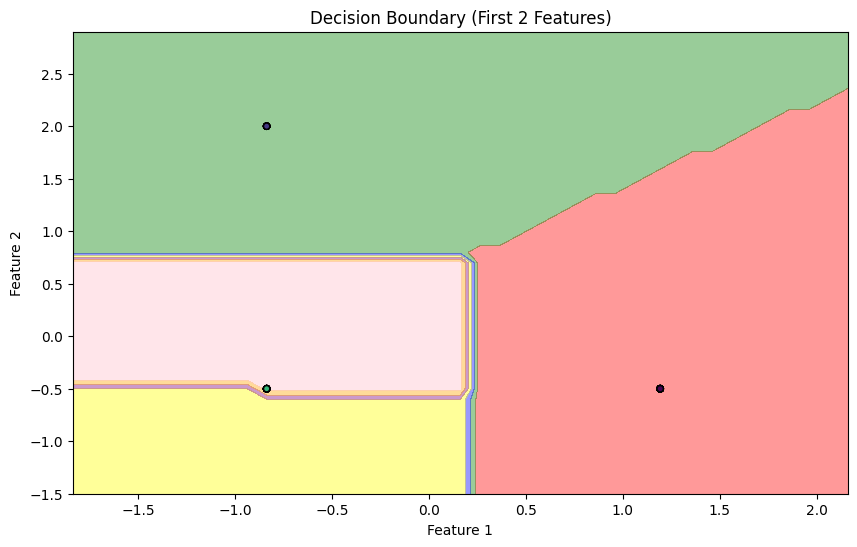

In [18]:
from matplotlib.colors import ListedColormap

# Use first 2 features for visualization
X_vis = X_train_scaled[:, :2]
X_test_vis = X_test_scaled[:, :2]

knn_vis = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_vis.fit(X_vis, y_train)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on mesh
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink')))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, s=20, edgecolor='k')
plt.title("Decision Boundary (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Interview Questions:**

## 1. What are the key hyperparameters in KNN (K-Nearest Neighbours) ?

### 1. `n_neighbors`
- **What it is:** The number of nearest neighbors to look at when making a prediction.
- **Example:** If `n_neighbors = 5`, the algorithm looks at the 5 closest data points.
- **Effect:**
  - A small number → model may be sensitive to noise (overfitting).
  - A large number → smoother decision boundary but may miss small patterns (underfitting).
- **Common values:** 3, 5, 7, etc.

---

### 2. `metric`
- **What it is:** The distance metric used to find neighbors.
- **Common options:**
  - `'euclidean'` → straight-line distance (default and most common).
  - `'manhattan'` → distance measured along axes (city block distance).
  - `'minkowski'` → generalized distance (can act like Euclidean or Manhattan depending on the `p` value).
  - `'cosine'`, `'hamming'`, etc.

---

### 3. `weights`
- **What it is:** How to weight the contribution of neighbors.
- **Options:**
  - `'uniform'`: All neighbors contribute equally (**default**).
  - `'distance'`: Closer neighbors have a bigger influence.

---

### 4. `algorithm`
- **What it is:** Algorithm used to compute nearest neighbors efficiently.
- **Options:**
  - `'auto'`: Lets scikit-learn choose the best algorithm.
  - `'ball_tree'`: Good for large, continuous datasets.
  - `'kd_tree'`: Fast for low-dimensional data.
  - `'brute'`: Compares all points (slower but simple).

---

### 5. `p`
- **What it is:** Power parameter for the Minkowski metric:
  - If `p = 2`, it's Euclidean distance.
  - If `p = 1`, it's Manhattan distance.
- **Only used when `metric='minkowski'`.**

---

✅ **Summary Example:**

```python
KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')


## 2. What distance metrics can be used in KNN (K-Nearest Neighbours)?

KNN calculates the distance between data points to find the "nearest" ones. Below are the commonly used distance metrics:

---

### 1. **Euclidean Distance**
- **Meaning:** Straight-line distance between two points.
- **Formula:**  
  \[
  \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ... + (x_n - y_n)^2}
  \]
- **Use Case:** Most commonly used, especially for continuous data.
- **Set as:** `'euclidean'`

---

### 2. **Manhattan Distance (L1 Norm)**
- **Meaning:** Distance measured along axes at right angles (like city blocks).
- **Formula:**  
  \[
  |x_1 - y_1| + |x_2 - y_2| + ... + |x_n - y_n|
  \]
- **Use Case:** Works well when data is in grid-like layouts.
- **Set as:** `'manhattan'`

---

### 3. **Minkowski Distance**
- **Meaning:** A generalized form of both Euclidean and Manhattan distances.
- **Formula:**  
  \[
  \left( \sum |x_i - y_i|^p \right)^{1/p}
  \]
- **Use Case:** Can adjust the `p` parameter:
  - If `p=2`: Euclidean
  - If `p=1`: Manhattan
- **Set as:** `'minkowski'`

---

### 4. **Cosine Distance**
- **Meaning:** Measures the angle between two vectors, not the distance.
- **Use Case:** Used for text classification, recommendation systems, etc.
- **Set as:** `'cosine'`

---

### 5. **Hamming Distance**
- **Meaning:** Counts how many features are different between two samples.
- **Use Case:** Used for categorical or binary data.
- **Set as:** `'hamming'`

---

### ✅ **How to Set in scikit-learn**

Example:

```python
KNeighborsClassifier(n_neighbors=5, metric='manhattan')


# 🙏 Thank You! 😊